In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

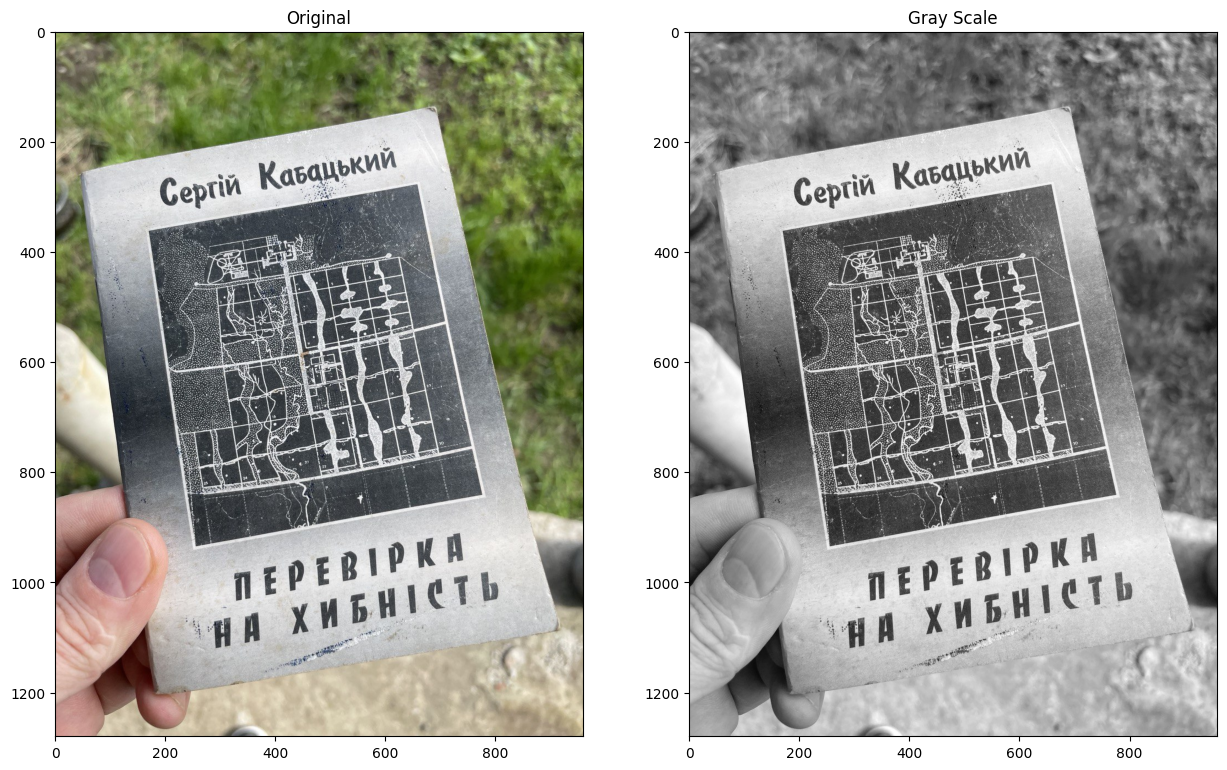

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('115.jpg')

# Convert it to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray) / 255
rows, cols = gray.shape

# Let's plot the images (colour and gray scale)
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.subplot(122), plt.imshow(gray, cmap='gray')
plt.title('Gray Scale')
plt.show()


In [16]:
# Compute Harris corners
block_size = 2
kernel_size = 3
k = 0.04
cornerness = cv2.cornerHarris(gray, block_size, kernel_size, k)
# We are not interested in edges, so put to zero all negative cornerness values
cornerness[cornerness < 0] = 0
# Take the logarithm for better visualization and manipulation
cornerness = np.log(cornerness + 1e-6)


(<Axes: >, <matplotlib.image.AxesImage at 0x7b176434b490>)

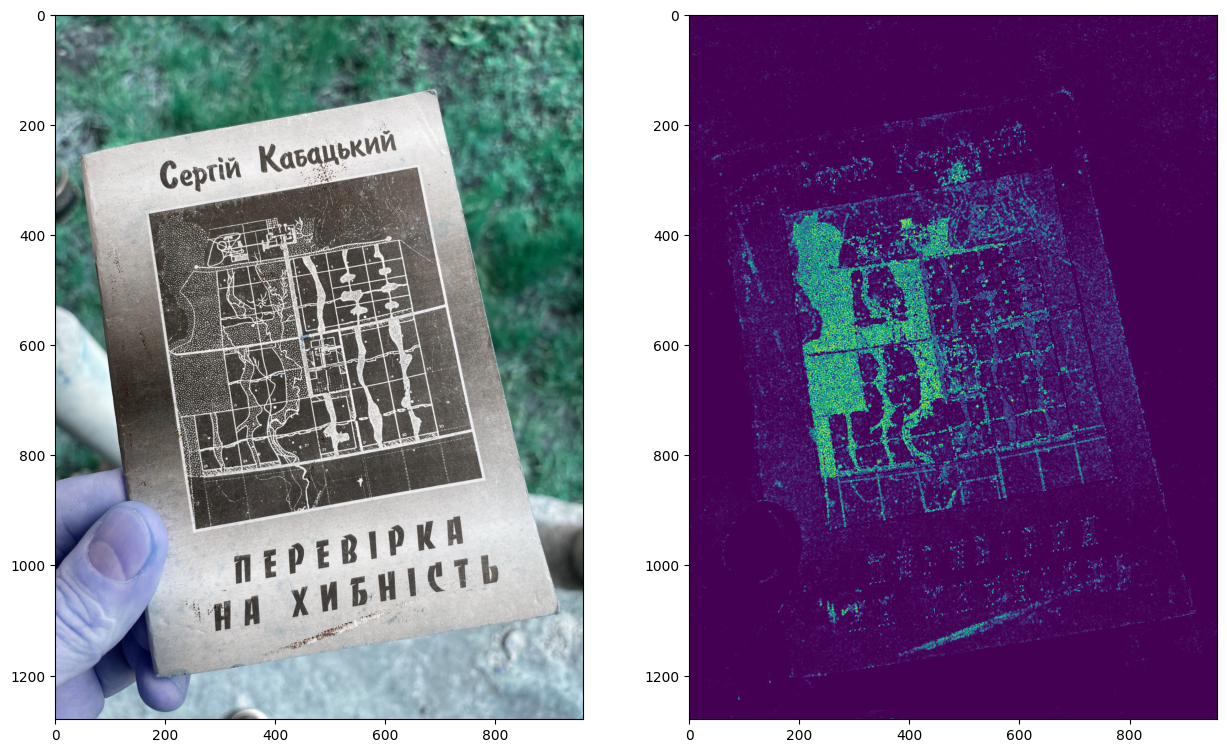

In [17]:
# plot the image and the corresponding Harris corners (in log scale)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(cornerness)

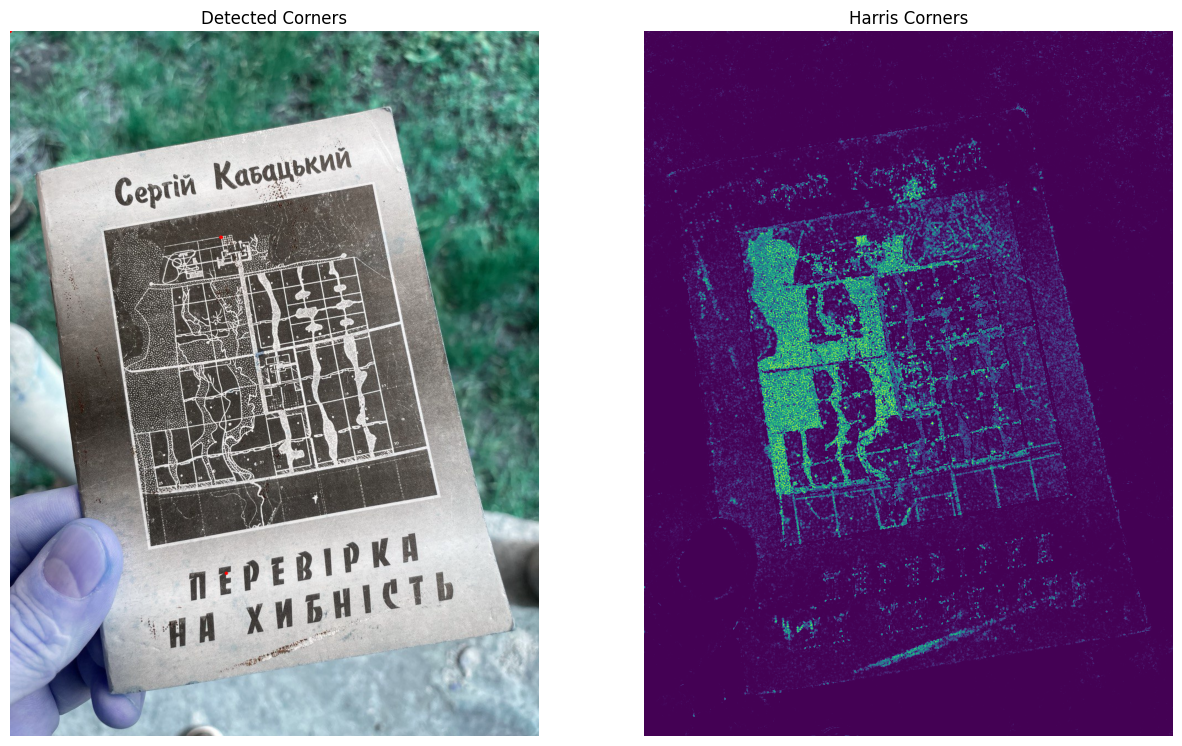

In [21]:
# Detection thresholds
th_top_left, th_top_right = -1e6, -1e6
th_bottom_left, th_bottom_right = -1e6, -1e6

# Corner coordinates
opt_top_left, opt_top_right = None, None
opt_bottom_left, opt_bottom_right = None, None

# Size of each quadrant (in pixels)
quad_size = 7

# Let's now scan the Harris detection results
for r in range(quad_size, rows-quad_size):
    for c in range(quad_size, cols-quad_size):
        # Edges with too small cornerness score are discarded, -7 seems like a good value
        if cornerness[r, c] < -7:
            continue

        # Extract block consisting of 4 quadrants
        block = 255*gray[r-quad_size:r+quad_size+1, c-quad_size:c+quad_size+1]

        # Extract the four quadrants
        quad_top_left = block[0:quad_size, 0:quad_size]
        quad_top_right = block[0:quad_size, -quad_size:]
        quad_bottom_left = block[-quad_size:, 0:quad_size]
        quad_bottom_right = block[-quad_size:, -quad_size:]

        # Top-left corner
        descriptor = np.mean(quad_bottom_right) - \
                     np.mean(quad_top_left) - np.mean(quad_top_right) - np.mean(quad_bottom_left)
        # Let's detect the best descriptor
        if descriptor > th_top_left:
            # We update the threshold
            th_top_left = descriptor
            # And we update the optimal location
            opt_top_left = (c, r)

        # implementation

# Let's draw circles at the detected corners
out = cv2.circle(img, opt_top_left, 3, (255,0,0), -1)
out = cv2.circle(img, opt_top_right, 3, (255,0,0), -1)
out = cv2.circle(img, opt_bottom_left, 3, (255,0,0), -1)
out = cv2.circle(img, opt_bottom_right, 3, (255,0,0), -1)

# And finally we plot the images (with the detected document corners)
plt.subplot(121), plt.imshow(out)
plt.title('Detected Corners')
plt.axis('off')

plt.subplot(122), plt.imshow(cornerness)
plt.title('Harris Corners')
plt.axis('off')

plt.show()
